In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import *
from maps import *

In [2]:
superstable_periods, superstable_λ_s = bruteforce_finding_superstable()

 Parameter  λ=1.999606  Period  1 
 Parameter  λ=3.235788  Period  2 
 Parameter  λ=3.498404  Period  4 
 Parameter  λ=3.554556  Period  8 


KeyboardInterrupt: 

In [ ]:
for λ, period in zip(superstable_λ_s[1:],superstable_periods[1:]):
    
    x = Logistic_map_seq(n,0.1,λ)
    d, x_near = d_i(x,period,n)


In [45]:
n = 30000
distance = np.array([])
nearest = np.array([])
for λ, period in zip(superstable_λ_s[1:],superstable_periods[1:]):
    
    x = Logistic_map_seq(n,0.1,λ)
    d, x_near = d_i(x,period,n)
    distance = np.hstack((distance,d))
    nearest = np.hstack((nearest,x_near))   


In [46]:
X = np.linspace(0.5*np.ones_like(nearest),nearest,n).T
f_i = np.array([])
for i, (p, λ) in enumerate(zip(superstable_periods[1:],superstable_λ_s[1:])):
    f = Logistic_map_i(X[i],λ,int(p))
    f_i = np.concatenate((f_i,f),axis=-1)

f_i = f_i.reshape(X.shape[0],-1)

[0.5000968  0.69095612 0.80894694]


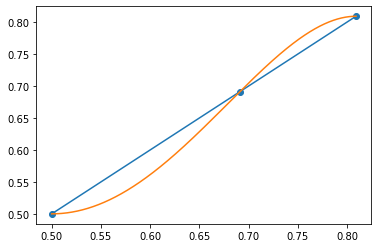

[0.38368434 0.42892198 0.4999023 ]


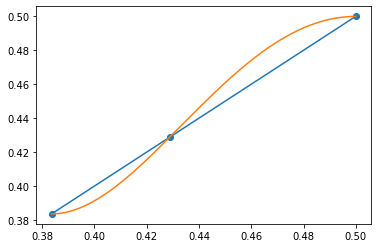

[0.50009754 0.52812529 0.54588736]


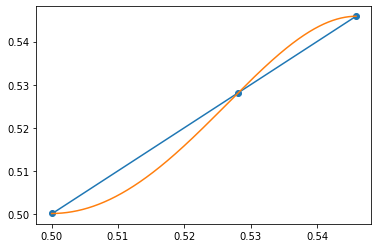

[0.48168283 0.48877845 0.49999006]


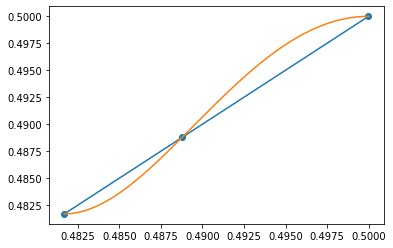

[0.50000964 0.5044793  0.50730969]


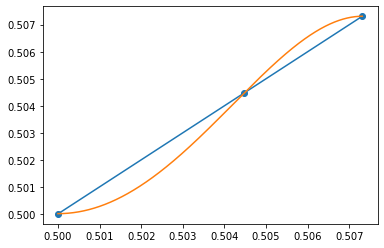

[0.49708502 0.49821266 0.49999041]


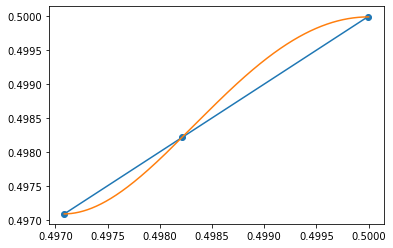

[0.50000994 0.5007118  0.50115907]


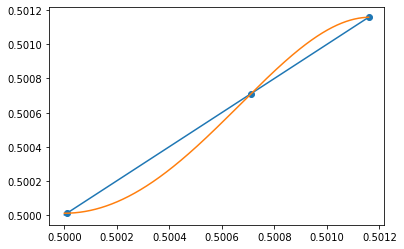

[0.49954222 0.49971772 0.49999019]


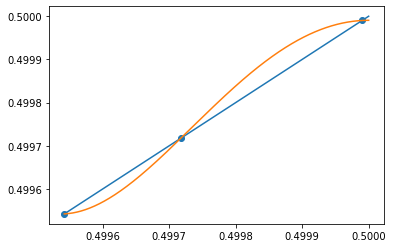

In [68]:
index, val = nearest_points(f_i,X,3)
x_for_g = np.array([])
for i in range(8):
    
    print(np.sort(val[i]))
    x_for_g = np.hstack((x_for_g,np.sort(val[i])[1]))
    plt.plot(X[i],X[i])
    plt.plot(X[i],f_i[i])
    plt.scatter(val[i],val[i])

    plt.show()

In [199]:
def Logistic_map_transformed(x_0,λ,α):
    x = λ * x_0 * (1-x_0 / α)
    return x

def transformed_Logistic_map_i(x_0,λ,i,α):
    f = Logistic_map_transformed(x_0,λ,α)
    if i:
        for _ in range(i-1):
            f = Logistic_map_transformed(f,λ,α)
    return f

In [265]:
def superstable_similar_interval(i=10,n=30000):
    distance = np.array([])
    nearest = np.array([])
    for λ, period in zip(superstable_λ_s[1:i],superstable_periods[1:i]):
    
        x = Logistic_map_seq(n,0.1,λ)
        d, x_near = d_i(x,period,n)
        distance = np.hstack((distance,d))
        nearest = np.hstack((nearest,x_near))
    
    X = np.linspace(0.5*np.ones_like(nearest),nearest,n).T
    f_i = np.array([])
    for k, (p, λ) in enumerate(zip(superstable_periods[1:i],superstable_λ_s[1:i])):
        f = Logistic_map_i(X[k],λ,p)
        f_i = np.concatenate((f_i,f),axis=-1)

    f_i = f_i.reshape(X.shape[0],-1)
    index, val = nearest_points(f_i,X,3)
    x_for_g = np.sort(val)[:,1]
    
    Interval = np.sort(np.concatenate((x_for_g[:,None],(1-x_for_g)[:,None]),axis=-1))
    
    return Interval

In [266]:
def f_i_transform(i=10,n=30000,α=-2.5029):
    Interval = superstable_similar_interval(i,n)
    Transformed_f_i = []
    
    for m, (p,λ,interval) in enumerate(zip(superstable_periods[1:i],superstable_λ_s[1:i],Interval)):
        t = np.linspace(interval[0], interval[1],5000)
        x = np.linspace(0,1,5000)
        transformed_f_i = (α ** (m + 1)) * (Logistic_map_i(t,λ,p)-0.5)
        Transformed_f_i.append(transformed_f_i)
        
        
    return Transformed_f_i


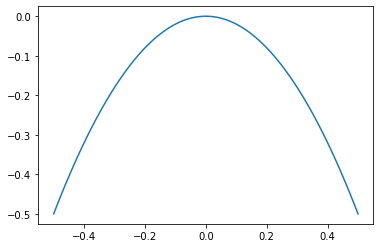

In [254]:
t = np.linspace(0,1,100)
f = Logistic_map_i(t,2,1)-0.5

plt.plot(t-0.5,f)

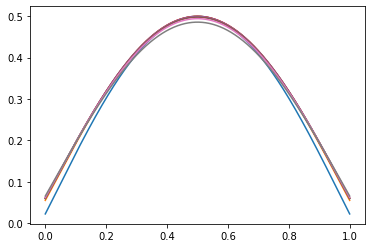

In [276]:
f_i_transform()

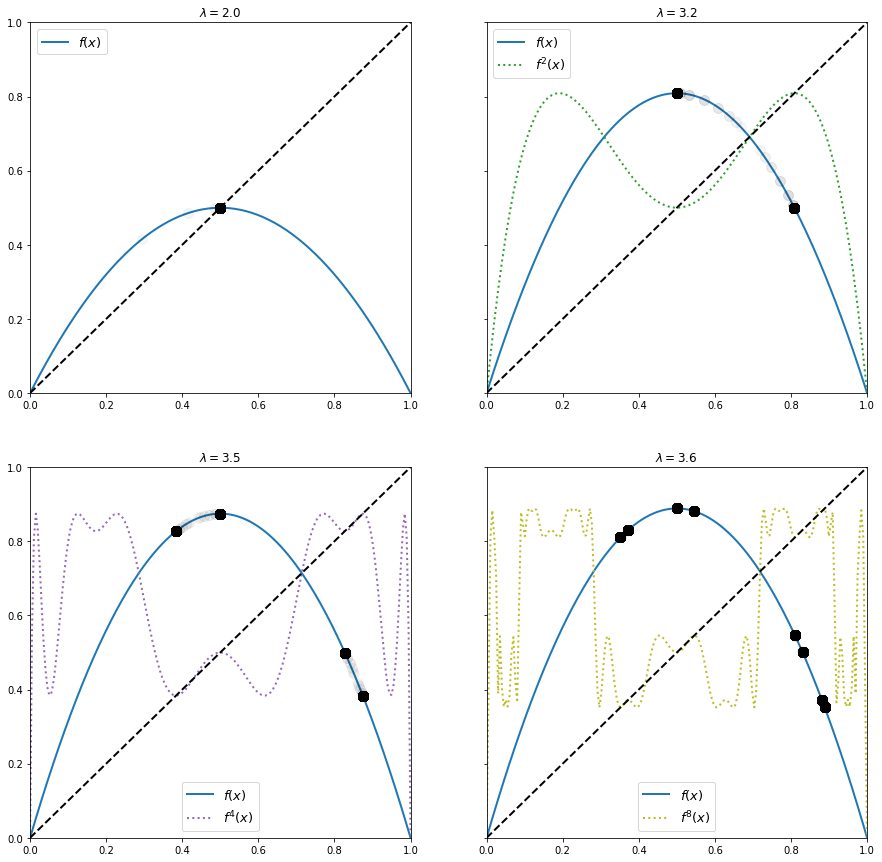

In [258]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(15, 15), sharey=True)

map_plot(0.1,superstable_λ_s[0],100,cobweb=False,ax=ax1);
map_plot(0.1,superstable_λ_s[1],100,f_i=[2],cobweb=False,ax=ax2);
map_plot(0.1,superstable_λ_s[2],300,f_i=[4],cobweb=False,ax=ax3);
map_plot(0.1,superstable_λ_s[3],300,f_i=[8],cobweb=False,ax=ax4);



In [268]:
a = [4,6,1,2]

In [269]:
a.remove(1)

In [270]:
a

[4, 6, 2]

In [271]:
None.remove(1)

AttributeError: 'NoneType' object has no attribute 'remove'

In [272]:
1 in [2,3]

False

In [273]:
1 in []

False

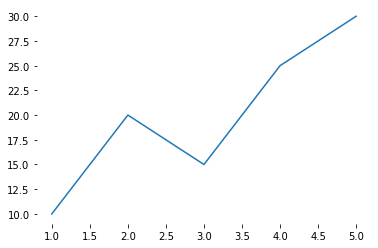

In [278]:
x = [1, 2, 3, 4, 5]
y = [10, 20, 15, 25, 30]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot your data
ax.plot(x, y)

# Turn off the axes border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Keep the tick labels
# ax.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Show the plot
plt.show()

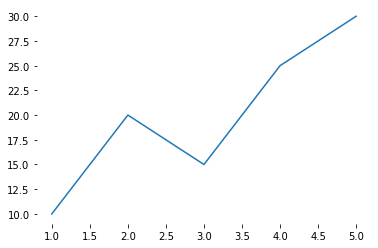

In [284]:
x = [1, 2, 3, 4, 5]
y = [10, 20, 15, 25, 30]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot your data
ax.plot(x, y)

# Turn off the axes border
ax.spines[['top','bottom','left','right']].set_visible(False)

# Keep the tick labels
# ax.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Show the plot
plt.show()